Kyle Timmermans - Dr. Li - Homework #3 - 03/27/21

In [ ]:
# Import statements to begin with
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 

In [ ]:
# Load a .csv file into a DataFrame object
df = pd.read_csv('http://storm.cis.fordham.edu/~yli/data/Homework3.csv')

**Problem 1:** Find out the size of the dataset and information about columns such as names, types of
data.

In [ ]:
df.info() # info() returns number of columns, rows, their names, and types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      148 non-null    int64  
 1   age         148 non-null    int64  
 2   income      148 non-null    int64  
 3   long_Month  148 non-null    float64
 4   internet    148 non-null    int64  
 5   balance     130 non-null    float64
 6   class       148 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 8.2 KB


**Problem 2:** Change data types for **region**, **internet** and **class** columns.
Values of columns such as region, internet and class are categorical data, however, the
system detected them as numerical values by default.

In [ ]:
# Uses format: df['col1'] = df['col1'].astype('category') 
df['region'] = df['region'].astype('category')  # col0 is region
df['internet'] = df['internet'].astype('category')  # col4 is internet
df['class'] = df['class'].astype('category')  # col6 is class

**Problem 3:** Find the statistics information of all columns with numerical values.

In [ ]:
# Select all columns with type 'np.number' and then use describe() on each column found
df.describe(include=[np.number])

,age,income,long_Month,balance
count,148.000000,148.000000,148.000000,130.000000
mean,41.858108,78.033784,12.801014,2.867875
std,12.246343,70.333841,11.020086,0.569537
min,20.000000,13.000000,1.650000,1.321756
25%,33.000000,33.000000,5.762500,2.490061
50%,41.000000,55.500000,10.225000,2.869293
75%,52.000000,101.250000,15.312500,3.274570
max,69.000000,460.000000,89.400000,4.471639


**Problem 4:** We would like to check the category distribution of each categorical data column. Draw
three bar plots for the above mentioned three categorical data columns. However, you
could not create bar plot for categorical data directly, you have to create the plot for
value_counts of the column.

In [ ]:
# Uses format = df[‘col’].value_counts( ).sort_index( ).plot.bar( )
# The categorical data columns are region, internet, and class
categoricalColumns = df.select_dtypes(include='category').columns.values
print(categoricalColumns)

['region' 'internet' 'class']


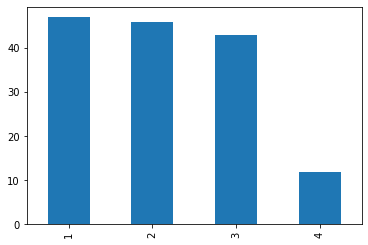

In [ ]:
# region column bar plot
df[categoricalColumns[0]].value_counts( ).sort_index( ).plot.bar( )

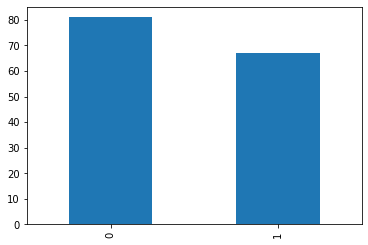

In [ ]:
# internet column bar plot
df[categoricalColumns[1]].value_counts( ).sort_index( ).plot.bar( )

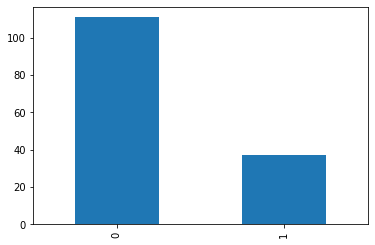

In [ ]:
# class column bar plot
df[categoricalColumns[2]].value_counts( ).sort_index( ).plot.bar( )

**Problem 5:**  Draw density plots for columns with numerical data, such as **age**, **income**, **long_Month**, and
**balance**.

In [ ]:
# Uses format = df[‘col’].sort_index().plot.density()
numericalColumns = df.select_dtypes(include=[np.number]).columns.values
print(numericalColumns)

['age' 'income' 'long_Month' 'balance']


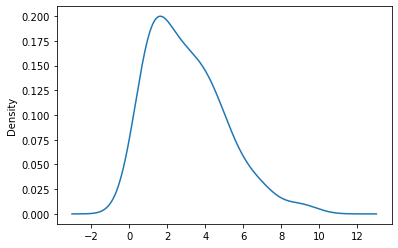

In [ ]:
# age column density 
df[numericalColumns[0]].value_counts( ).sort_index( ).plot.density( )

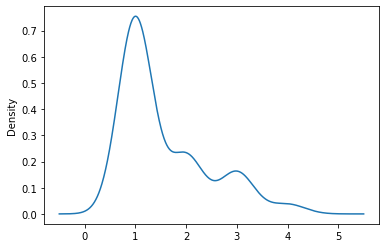

In [ ]:
# income column density 
df[numericalColumns[1]].value_counts( ).sort_index( ).plot.density( )

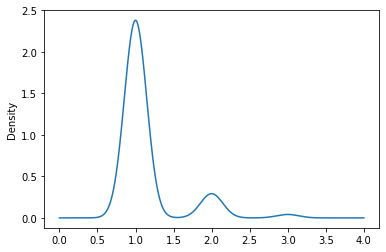

In [ ]:
# long_Month column density 
df[numericalColumns[2]].value_counts( ).sort_index( ).plot.density( )

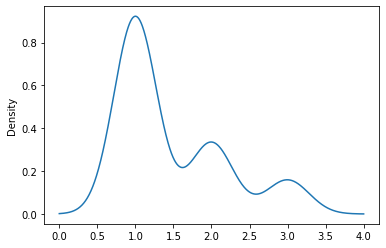

In [ ]:
# balance column density 
df[numericalColumns[3]].value_counts( ).sort_index( ).plot.density( )

**Problem 6:** Check whether columns with numerical data have outliers by drawing box plots (use the
formula we discussed in class, the factor is 1.5), if they do, replace them with the closer
boundary. Keep the original columns, adding new columns for processed features.
At the stage, you could create a copy of the original dataframe and drop old columns with outliers.

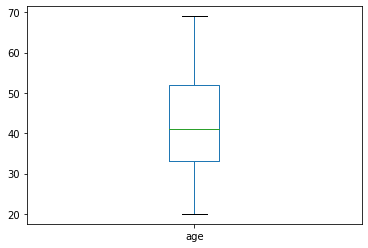

In [ ]:
# age column box plot
df[numericalColumns[0]].plot.box(whis=2)
# Does not have outliers

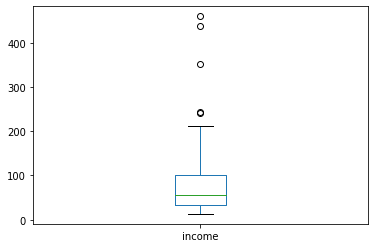

In [ ]:
# income column box plot
df[numericalColumns[1]].plot.box(whis=2)
# Contains outliers

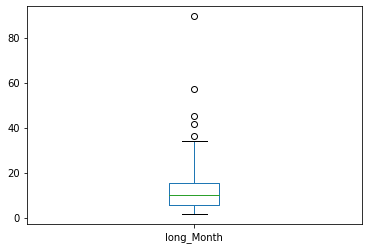

In [ ]:
# long_Month column box plot
df[numericalColumns[2]].plot.box(whis=2)
# Contains outliers

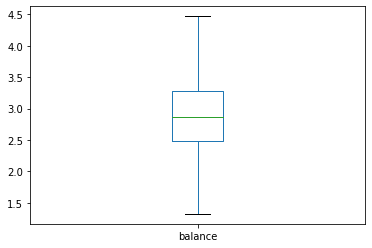

In [ ]:
# balance column box plot
df[numericalColumns[3]].plot.box(whis=2)
# Does not contain outliers

In [ ]:
# Removing outliers with algortihm discussed in class(Factor is 1.5)
# Turn into function so we can reuse
def check_outliers(x):
  q25 = x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  l = q25 - IQR*2
  u = q75 + IQR*2
  return l, u

# The outlier columns that need to be fixed: income (nC[1]), long_Month (nC[2])

# income column
lower, upper = check_outliers(df[numericalColumns[1]])
print(f'lower = {lower}, upper={upper}')  # Get upper and lower bound of outliers

# Show amount of numbers that are under the lower bound and above the upper bound, they are our outliers
mask_lower = df[numericalColumns[1]]<lower 
print("Mask lower: " + str(mask_lower.sum()))
mask_upper = df[numericalColumns[1]]>upper
print("Mask upper: " + str(mask_upper.sum()))

# Set new column to old column and change to upper
df['new_income'] = df['income']
for i in df[mask_upper].index:
  df.loc[i,'new_income'] = upper

# long_Month column
lower, upper = check_outliers(df[numericalColumns[2]])
print(f'lower = {lower}, upper={upper}')  

mask_lower = df[numericalColumns[2]]<lower
print("Mask lower: " + str(mask_lower.sum()))
mask_upper = df[numericalColumns[2]]>upper
print("Mask upper: " + str(mask_upper.sum()))

df['new_long_Month'] = df['long_Month']
for i in df[mask_upper].index:
  df.loc[i,'new_long_Month'] = upper

# Create new DataFrame and delete old numerical columns that contain outliers
df2 = df
del df2['income'] 
del df2['long_Month']

# Show new DataFrame, df2
print("\n_____________________________________\n")
df2.info()

lower = -103.5, upper=237.75
Mask lower: 0
Mask upper: 5
lower = -13.337500000000002, upper=34.4125
Mask lower: 0
Mask upper: 5

_____________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   region          148 non-null    category
 1   age             148 non-null    int64   
 2   internet        148 non-null    category
 3   balance         130 non-null    float64 
 4   class           148 non-null    category
 5   new_income      148 non-null    float64 
 6   new_long_Month  148 non-null    float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 5.6 KB


**Problem 7:** Please fill missing values in **balance** column with group mean. There are two different types
of columns in this dataset – categorical data and numerical data.


*   a) To check whether to use group mean of a column with categorical data, study their group means of **balance**; if there are big differences among group means, the column is a good candidate. 
*   b) To check whether to use group mean of a column with numerical data, exam the density plots we have created, based on their patterns, select the column having similar distribution as the **balance** column. 
*   c) If a column eventually selected has numerical data, create bins first, you could try
equal-width or equal-frequency binning, then use bin mean to fill the missing value. Please make this decision by yourself after checking all candidates, and explain your decision. 





In [ ]:
# The balance column is numerical data, so we will take option (c)
df2.balance.dtype.name

'float64'

In [ ]:
# Binning the balance column with equal width
df2['balance_bin_ew'] = pd.cut(df2['balance'], 4)
df2['balance_bin_ew_numerical'] = df2['balance_bin_ew'].astype('category').cat.codes  # Change balance_bin_ew to numerical data
balanceEWmean = df2['balance_bin_ew_numerical'].mean()  # Get the mean of that data
print("The missing values in the balance column will be filled with: " + str(balanceEWmean))


The missing values in the balance column will be filled with: 1.1418918918918919


In [ ]:
# Fill in the missing values in the original balance column with the Equal width binned and averaged value
df2['balance'].fillna(value=balanceEWmean, inplace=True)  # Inplace parameter fixes NaN issue
del df2['balance_bin_ew']   # Remove the temporary binning columns
del df2['balance_bin_ew_numerical']
print(df2['balance'].head(10))
# As we can see in the head of df2, the 8th value was replaced with 1.41, as all the missing values were replaced with this float

0    2.014903
1    2.724580
2    3.409496
3    2.602690
4    2.169054
5    3.146305
6    2.484907
7    2.803360
8    1.141892
9    3.167583
Name: balance, dtype: float64


**Reasoning for solution to problem 7:** I used cut (Equal width) so I could get bins of equal spacing with different frequency of samples in each bin. This gives us a realistic scenario of different samples of balances, thus ultimately giving a realistic mean of all the balances to replace the empty values in the balances column.


**Problem 8:** Check whether there are columns positively related with each other by drawing pairplots and calculate pearson correlation coefficients for numerical features. Describe your observation.

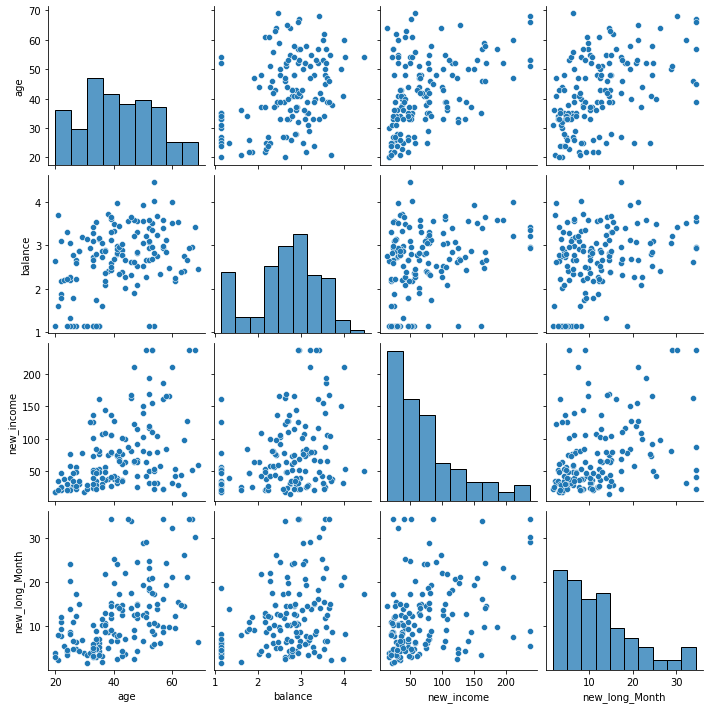

In [ ]:
# Import seaborn for pairplot method
import seaborn as sns

sns.pairplot(df2)

In [ ]:
# age -> all, balance -> all, new_income -> all, new_long_Month -> all
# corr() used to find pearson correlation
# 1.0 for self to self correlation as they are exactly the same (same column)
print(df2.corr())
print("\n_____________________________________________________\n")
print("Indicated by this relationship matrix:")
print("age and new_long_Month have the most positive correlation coefficient at 0.489360")
print("new_income and balance have the lowest correlation coefficient at 0.290997")

                     age   balance  new_income  new_long_Month
age             1.000000  0.373345    0.435056        0.489360
balance         0.373345  1.000000    0.290997        0.338048
new_income      0.435056  0.290997    1.000000        0.336828
new_long_Month  0.489360  0.338048    0.336828        1.000000

_____________________________________________________

Indicated by this relationship matrix:
age and new_long_Month have the most positive correlation coefficient at 0.489360
new_income and balance have the lowest correlation coefficient at 0.290997


**Problem 9:** Perform Min_Max Normalization and Z_score Normalization on all columns with numerical data, compare them, which method you prefer? 

In [ ]:
# Scikit learn z-score normalization
from sklearn.preprocessing import StandardScaler  # StandardScaler = z-score normalization
zscore = StandardScaler().fit_transform(df2.values)  # Apply z-score normalization
zscore_df = pd.DataFrame(zscore, index=df2.index, columns=df2.columns)  # Put z-score normalization data into DataFrame
zscore_df[['age', 'balance', 'new_income', 'new_long_Month']]  # Only numerical data columns

,age,balance,new_income,new_long_Month
0,0.175494,-0.829505,-0.187926,-1.033841
1,-0.725783,0.085937,1.120284,-0.948123
2,0.830969,0.969441,0.756892,0.735627
3,-0.234177,-0.071294,0.066448,-0.041959
4,-1.627060,-0.630659,-1.005558,-0.152168
...,...,...,...,...
143,-1.708995,-1.352532,-1.005558,-0.519532
144,-0.234177,1.280526,-0.623996,2.727045
145,2.223852,-0.250385,-0.296944,-0.709337
146,1.896115,0.020884,0.974927,1.109114


In [ ]:
# Scikit learn minx-max normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_import = MinMaxScaler()  # Import scaler
dataMinMaxScaleDF[['age', 'balance', 'new_income', 'new_long_Month']] = min_max_scaler_import.fit_transform(df2[['age', 'balance', 'new_income', 'new_long_Month']])
del dataMinMaxScaleDF[0], dataMinMaxScaleDF[1], dataMinMaxScaleDF[2], dataMinMaxScaleDF[3]  # Clean DataFrame
dataMinMaxScaleDF

,age,balance,new_income,new_long_Month
0,0.489796,0.262185,0.226919,0.062572
1,0.265306,0.475318,0.547275,0.083937
2,0.653061,0.681014,0.458287,0.503625
3,0.387755,0.438711,0.289210,0.309805
4,0.040816,0.308480,0.026696,0.282335
...,...,...,...,...
143,0.020408,0.140415,0.026696,0.190767
144,0.387755,0.753441,0.120133,1.000000
145,1.000000,0.397016,0.200222,0.143457
146,0.918367,0.460172,0.511680,0.596719


**Comparing Z-Score and Min-Max Normalization:** Min-max is the optimal normalization method for this data set because we have already removed the outliers. Min-max normalization will ensure that all the data will be on the same scale. Z-score normalization would be the optimal choice if we still had outliers present because the normalized data it returns is not on the same scale.